In [1]:
from src.data import _load_readmission_dataset, _load_simData
from src.helper_functions import _prepare_rt_tensors
from src.models import *
from src.losses import *    
from src.training import *
from src.metrics import *

In [2]:
# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
x, t, e, d = _load_readmission_dataset(sequential=True)

/home/ayush/DeepReEvent/src/data.py:47: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data['max_time'] = data.groupby('id')['t.stop'].transform(max)


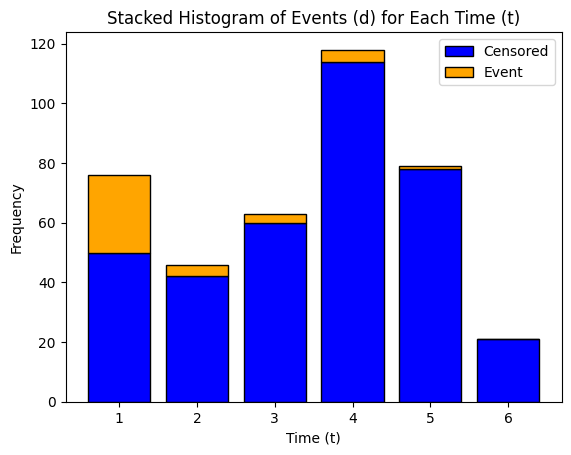

In [30]:
import numpy as np
import matplotlib.pyplot as plt


t = np.array(t)
d = np.array(d)
unique_t = np.unique(t)

counts_d0 = np.zeros_like(unique_t)
counts_d1 = np.zeros_like(unique_t)

# Compute counts for d = 0 and d = 1 for each unique t
for i, u in enumerate(unique_t):
    counts_d0[i] = np.sum((t == u) & (d == 0))
    counts_d1[i] = np.sum((t == u) & (d == 1))


# Plot the stacked histogram
bar_width = 0.8
plt.bar(unique_t, counts_d0, width=bar_width, label='Censored', color='blue', edgecolor='black')
plt.bar(unique_t, counts_d1, width=bar_width, bottom=counts_d0, label='Event', color='orange', edgecolor='black')

plt.xlabel('Time (t)')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Events (d) for Each Time (t)')
plt.legend()
plt.show()

## Patients facing the highest number of events in a single interval

In [60]:
# Dictionary to store the most common element and its count for each array
import numpy as np
from collections import Counter

most_common_dict = {}

# Find and store the most common element and its count in each array
for i, arr in enumerate(e):
    counter = Counter(arr)
    most_common_element, highest_count = counter.most_common(1)[0]  # Get the most common element and its count
    most_common_dict[f'Array {i + 1}'] = (most_common_element, highest_count)

# Find the key with the highest count
max_count = 0
max_key = None

for array_name, (element, count) in most_common_dict.items():
    if count > max_count:
        max_count = count
        max_key = array_name

# Print the key with the highest count
print(f"\nThe array with the highest count is {max_key}, where the element {most_common_dict[max_key][0]} appears {max_count} times")



The array with the highest count is Array 350, where the element 1 appears 21 times


## Libraries and their versions

In [15]:
import sksurv
import sklearn
import numpy as np
import pandas as pd
import torch
import matplotlib

# Get versions of the imported packages
versions = {
    'sksurv': sksurv.__version__,
    'sklearn': sklearn.__version__,
    'numpy': np.__version__,
    'pandas': pd.__version__,
    'torch': torch.__version__,
    'matplotlib': matplotlib.__version__
    
}

# Print the versions of imported packages
for package, version in versions.items():
    print(f"{package}=={version}")


sksurv==0.22.1
sklearn==1.3.1
numpy==1.26.1
pandas==2.1.1
torch==2.1.0+cu121
matplotlib==3.8.0


## Results from Wang et al. (2023)

In [12]:
import pandas as pd

# Create a dictionary with the data
data = {
    "Time": [0.0, 1.0, 2.0, 3.0, 4.0, 4.50],
    "y": [0.5819134, 0.6262855, 0.6155859, 0.5484110, 0.4222629, 0.3420796],
    "y.low": [0.4551563, 0.5475601, 0.5280923, 0.4464171, 0.2556209, 0.1259952],
    "y.high": [0.7086704, 0.7050109, 0.7030795, 0.6504048, 0.5889050, 0.5581641]
}

# Create the DataFrame
df = pd.DataFrame(data)

df["Time"] = df["Time"] + 1
df["Time"][5] = 6 # Since 6th time is't given, we use the 4.5th value. 
df["diff"] = df["y"] - df["y.low"]
df.drop(["y.low", "y.high"], axis=1, inplace=True)
print(df.round(2))


   Time     y  diff
0   1.0  0.58  0.13
1   2.0  0.63  0.08
2   3.0  0.62  0.09
3   4.0  0.55  0.10
4   5.0  0.42  0.17
5   6.0  0.34  0.22
